### DATA103 Final Project <br>
Submitted by **ALDECOA**, Renzel; **LLANES**, Arlan; **OPALLA**, Rijan - S11

---
#### Statment of the Problem

The <a href="https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset">USA Real Estate Dataset</a> offers listings of property sold in the USA across multiple states. According to the author, the data was collected from <a href="https://www.realtor.com/">realtor.com</a>, a real estate listing website managed by *Move, Inc.*, a company based in Santa Clara, California.

The dataset contains **2,226,382** property listings with **10** features. These features are the following:
- `brokered by` - an encoded identification number for an agency/broker
- `status` - housing status; can be (a) ready for sale, (b) sold, or (c) ready to build
- `price` - housing price; either current listing price or recently sold price
- `bed` - number of beds in the property
- `bath` - number of bathrooms in the property
- `acre_lot` - total property/lot area, in acres
- `street` - encoded street address
- `city` - city where the property is located
- `state` - state where the property is located
- `zip_code` - postal code of the area
- `house_size` - the size of the property, in square feet; and
- `prev_sold_date` - previous date of sale

This will be a **<>** problem.
<br>
< Objective >
<br>
< Who will benefit from this? >

Main features:
- `price`
- `bed` (number of bedrooms)
- `bath` (number of bathrooms)
- `acre_lot` (area of lot in acres)
- `house_size` (size of house in square feet)

---
#### Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
#### Extracting dataset from compressed file

The dataset itself is **large**, amounting to **178.86** MB of space. The dataset is pushed into the repository in a compressed state, as to not require the use of *Git LFS* (Large File Storage) 

In [9]:
import zipfile
with zipfile.ZipFile('USA-Real-Estate/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('USA-Real-Estate/')

In [10]:
df = pd.read_csv("USA-Real-Estate/realtor-data.zip.csv", low_memory=False)
df.shape

(2226382, 12)

---
#### Exploring the dataset

In [12]:
df.head(3)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN


The features include the following:

In [14]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [15]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

Brief statistical description of `float` type features (that are **not** numbers used for categorical encoding):

In [17]:
df_desc = df[["price", "bed", "bath", "acre_lot", "house_size"]].describe().T
df_desc

,count,mean,std,min,25%,50%,75%,max
price,2224841.0,524195.519291,2.138893e+06,0.0,165000.00,325000.00,550000.00,2.147484e+09
bed,1745065.0,3.275841,1.567274e+00,1.0,3.00,3.00,4.00,4.730000e+02
bath,1714611.0,2.496440,1.652573e+00,1.0,2.00,2.00,3.00,8.300000e+02
acre_lot,1900793.0,15.223027,7.628238e+02,0.0,0.15,0.26,0.98,1.000000e+05
house_size,1657898.0,2714.471335,8.081635e+05,4.0,1300.00,1760.00,2413.00,1.040400e+09


As seen in the maximum values for the features `bed`, `bath`, and `acre_lot`,
it seems that the dataset is not limited to living spaces such as apartments, houses, etc. Let's see what listings have these kinds of values and deduce what type of property they could be, starting with `acre_lot`.

In [19]:
acre_lot_max = df.loc[df["acre_lot"] == df_desc.at["acre_lot", "max"]]
print(f"Number of records: {acre_lot_max.shape[0]}")
acre_lot_max.head()

Number of records: 52


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
3303,88715.0,for_sale,585000.0,4.0,4.0,100000.0,1930360.0,San Juan,Puerto Rico,926.0,3300.0,NaN
32658,82261.0,for_sale,129000.0,2.0,1.0,100000.0,598202.0,Whitehall,New York,12887.0,1352.0,NaN
54006,67217.0,for_sale,485000.0,4.0,3.0,100000.0,1081800.0,Scotch Plains,New Jersey,7076.0,NaN,1974-11-08
134682,40690.0,for_sale,160000.0,3.0,2.0,100000.0,437002.0,Bethlehem,New York,12158.0,1396.0,NaN
284083,30276.0,for_sale,364000.0,3.0,1.0,100000.0,395675.0,Sanford,North Carolina,27330.0,1250.0,2000-11-22


In [20]:
acre_lot_max[["price", "bed", "bath", "house_size"]].describe().T

,count,mean,std,min,25%,50%,75%,max
price,52.0,1.233810e+06,4.502941e+06,35000.0,157350.0,289450.0,496249.75,26500000.0
bed,46.0,2.913043e+00,8.386785e-01,1.0,2.0,3.0,3.00,5.0
bath,46.0,2.195652e+00,8.594460e-01,1.0,2.0,2.0,2.00,5.0
house_size,41.0,1.670902e+03,7.669914e+02,440.0,1160.0,1352.0,1805.00,3497.0


These 52 properties have **100,000** acres (or **~404,686,000** square meters) of land. These listings cannnot just be land, ready for development, as all of these records have at least 1 `bed` and `bath`. These properties may be luxurious mansions with a *lot* of free space. We can get rid of these listings as we aim to assist the average homeowner-to-be.

The next features to be investigated would be `bed` and `bath`.

In [22]:
num_bed = df_desc.at["bed", "max"]
num_bath = df_desc.at["bath", "max"]

print(f"Maximum number of bedrooms: {num_bed}")
print(f"Maximum number of bathrooms: {num_bath}")

Maximum number of bedrooms: 473.0
Maximum number of bathrooms: 830.0


The maximum number of bedrooms and bathrooms may refer to an entire building of living spaces, such as residential towers or apartment complexes. Let's find the records with such values.

In [24]:
bed_max = df.loc[df["bed"] == df_desc.at["bed", "max"]]
print(f"Number of records: {bed_max.shape[0]}")
bed_max.head()

Number of records: 1


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
583135,21069.0,for_sale,225000.0,473.0,157.0,NaN,975782.0,Brent,Alabama,35034.0,NaN,NaN


In [25]:
bath_max = df.loc[df["bath"] == df_desc.at["bath", "max"]]
print(f"Number of records: {bath_max.shape[0]}")
bath_max.head()

Number of records: 1


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1378596,65903.0,for_sale,699000.0,222.0,830.0,0.34,541082.0,Dallas,Oregon,97338.0,NaN,2006-04-10


These listings appear to be towers or tall buildings housing multiple living spaces, such as residential towers or hotels. This is evident in their small ```acre_lot```. If the building is not wide, it must have built upwards to accomodate such number of rooms.

Just in case, let's check the unique values for ```bed``` and ```bath``` to see which listings are similar to what were found above.

In [27]:
df["bed"].unique()

array([  3.,   4.,   2.,   6.,   5.,   1.,   9.,  nan,   7.,   8.,  12.,
        13.,  10.,  11.,  33.,  24.,  28.,  14.,  18.,  20.,  16.,  15.,
        19.,  17.,  40.,  21.,  86.,  31.,  27.,  42.,  60.,  22.,  32.,
        99.,  49.,  29.,  30.,  23.,  46.,  36.,  68., 123.,  25.,  47.,
        35.,  38.,  64.,  48.,  75., 142.,  61.,  70.,  53.,  26.,  34.,
        54.,  71., 210.,  66.,  44.,  37.,  62.,  72., 100.,  55.,  74.,
        73., 473.,  52., 110., 136.,  50.,  98., 102.,  69.,  82.,  41.,
        76.,  43.,  80.,  67., 190.,  93.,  45.,  96.,  57.,  39.,  56.,
        63.,  90., 108., 111., 212.,  88., 222., 444., 148.,  84., 114.,
       120.])

In [28]:
df["bath"].unique()

array([  2.,   1.,   3.,   5.,   4.,   7.,   6.,  nan,   8.,   9.,  10.,
        12.,  13.,  35.,  11.,  16.,  15.,  18.,  20.,  14.,  36.,  25.,
        17.,  19.,  56.,  42.,  51.,  28., 198.,  22.,  33.,  27.,  30.,
        29.,  24.,  46.,  21., 123.,  39.,  43.,  32.,  45.,  64.,  31.,
        54.,  68.,  23.,  37.,  26., 212.,  69.,  44.,  49.,  60.,  70.,
        71., 157.,  97.,  99.,  47.,  80.,  38.,  48.,  52.,  72., 752.,
        40., 163., 460.,  53.,  62.,  78.,  66.,  57.,  74.,  86., 108.,
        41.,  34.,  58., 113.,  50.,  88., 830., 222., 175.,  55.])

Some listings have their number of rooms going at the hundreds. Let's check how many listings fall under each number of bedrooms.

In [166]:
bed_df = pd.DataFrame(df["bed"].value_counts()).reset_index()
bed_df["bed"] = bed_df["bed"].astype(int).astype(str)
bed_df = pd.concat([bed_df[0:5], pd.DataFrame([["6+", bed_df[5:].sum()["count"]]], columns=["bed", "count"])], axis=0)
bed_df

,bed,count
0,3,753923
1,4,440566
2,2,311019
3,5,120637
4,1,65098
0,6+,53822


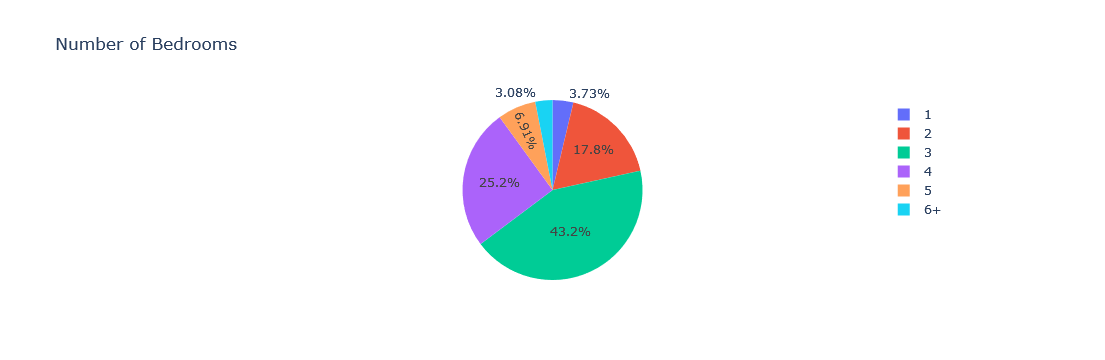

In [168]:
import plotly.express as px

fig = px.pie(
    bed_df,
    values='count',
    names='bed',
    title='Number of Bedrooms',
    category_orders={
        "bed": ["1", "2", "3", "4", "5", "6+"]
    },
    labels={
        "bed": "# of Bedrooms"
    }
)
    
fig.show()

Most listings in the dataset have around **2-4** bedrooms - a usual number of bedrooms an average home buyer would look for. 1-bedroom listings surprisingly are *fewer* than 5-bedroom listings. <br>

2-, 3-, and 4-bedroom listings make up **17.8%**, **43.2**, and **25.2%** of the dataset, respectively (in total, **86.2%** or **1,505,508** listings). This is reassuring, as we will still have an ample amount of data to work with even if the dataset was filtered to have listings with the usual number of bedrooms for homeowners.

---
#### Data Preprocessing

---
#### Model Development

---
#### Model Results

---
#### Model Interpretability